In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.optimize
import sympy as sp

# 1. Inlet perturbation boundary condition

In order to create vortex shedding in a faster way, it can be induced by using a boundary condition that introduces a perturbation in the flow. The boundary condition applied on the inlet will perturbate the system. It creates a small peak along the y-axis in a very small step of time, returning quickly back to the original value of the velocity before the perturbation. The function have some parameters that allow the movement of the perturbation in time and space, and also to modify the steady value.

Text(0.5,0.92,'Inlet Velocity BC')

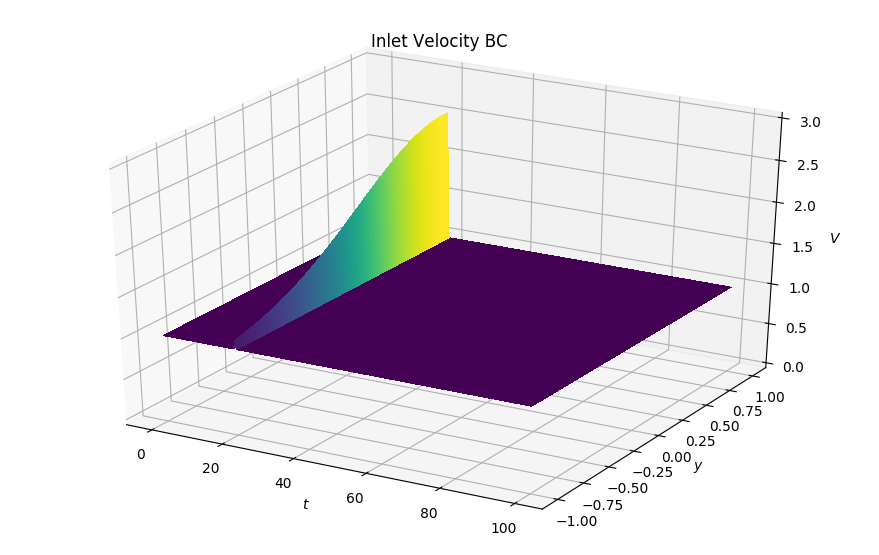

In [2]:
# linspace of the vertical axis of the grid
y = np.linspace(-1,1,250)
# linspace for the time
t = np.linspace(0,100,250)

# meshgrid with the data for the 3D view
Y, T = np.meshgrid(y, t)

# parameters of the function
steadyVal = 1
pertbTime = 20
peakAmp = 2
yPos = 1
timeCmp = 0.025
yCmp = 1.5

# function
Z = steadyVal+peakAmp*np.exp(-((T-pertbTime)**2)/(timeCmp)-((Y-yPos)**2)/(yCmp))

# plot the function
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, Y, Z, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_zlabel('$V$')
ax.set_zlim([0,3])
ax.set_title('Inlet Velocity BC')

The steady-state value of the velocity is $1\ m/s$, having a peak of a little more than twice the steady state value located in the $y=1$. In this case a perturbation is introduced in the flow at $t=20\ s$, with a time duration of $0.025\ s$. 

# 2. Vortex shedding analysis

## 2.1. Joint of all timestep PlotOverLine files

A cylinder case hase been simulated and the data from two slices (one located above and one located below the cylinder) of the simulation has been extracted and all timesteps have been saved in different <tt>.csv</tt>, stored in the same folder as the notebook is. To merge all data in just one big matrix and save it in one file for each line, make the next cell of type Code - i.e. press <tt> Y </tt> whereas the cell is selected and execute it. The different <tt> .csv </tt> files have been deleted.

## 2.2. Analysis

In [3]:
# the 3D arrays have as components: [time, points, header]
above = np.load('above.npy')
below = np.load('below.npy')

# full simulation time
timesteps = np.shape(above)[0]
# line length above slice
lineLengthA = above[0,:,5]
# linspace for the time array
timeA = np.linspace(0, timesteps, timesteps)

# line length above slice
lineLengthB = below[0,:,5]
# linspace for the time array
timeB = np.linspace(0, timesteps, timesteps) 

## 2.3. 3D representation

In [4]:
# create the meshgrid for the computations
LLa, TSa = np.meshgrid(lineLengthA, timeA)
# convert the list to array
pressureFieldA = np.array([above[0,:,0]])
# append the data ordered as desired
for i in range(1, np.shape(above)[0]):
    pressureFieldA = np.append(pressureFieldA, [above[i,:,0]], axis=0)

# create the meshgrid for the computations
LLb, TSb = np.meshgrid(lineLengthB, timeB)
# convert the list to array
pressureFieldB = np.array([below[0,:,0]])
# append the data ordered as desired
for i in range(1, np.shape(above)[0]):
    pressureFieldB = np.append(pressureFieldB, [below[i,:,0]], axis=0)

In [5]:
# get the minimum and maximum values of the domain 
minVal = np.min([pressureFieldA.min(),pressureFieldB.min()])
maxVal = np.max([pressureFieldA.max(),pressureFieldB.max()])

Text(0.5,1,'Pressure Field below cylinder')

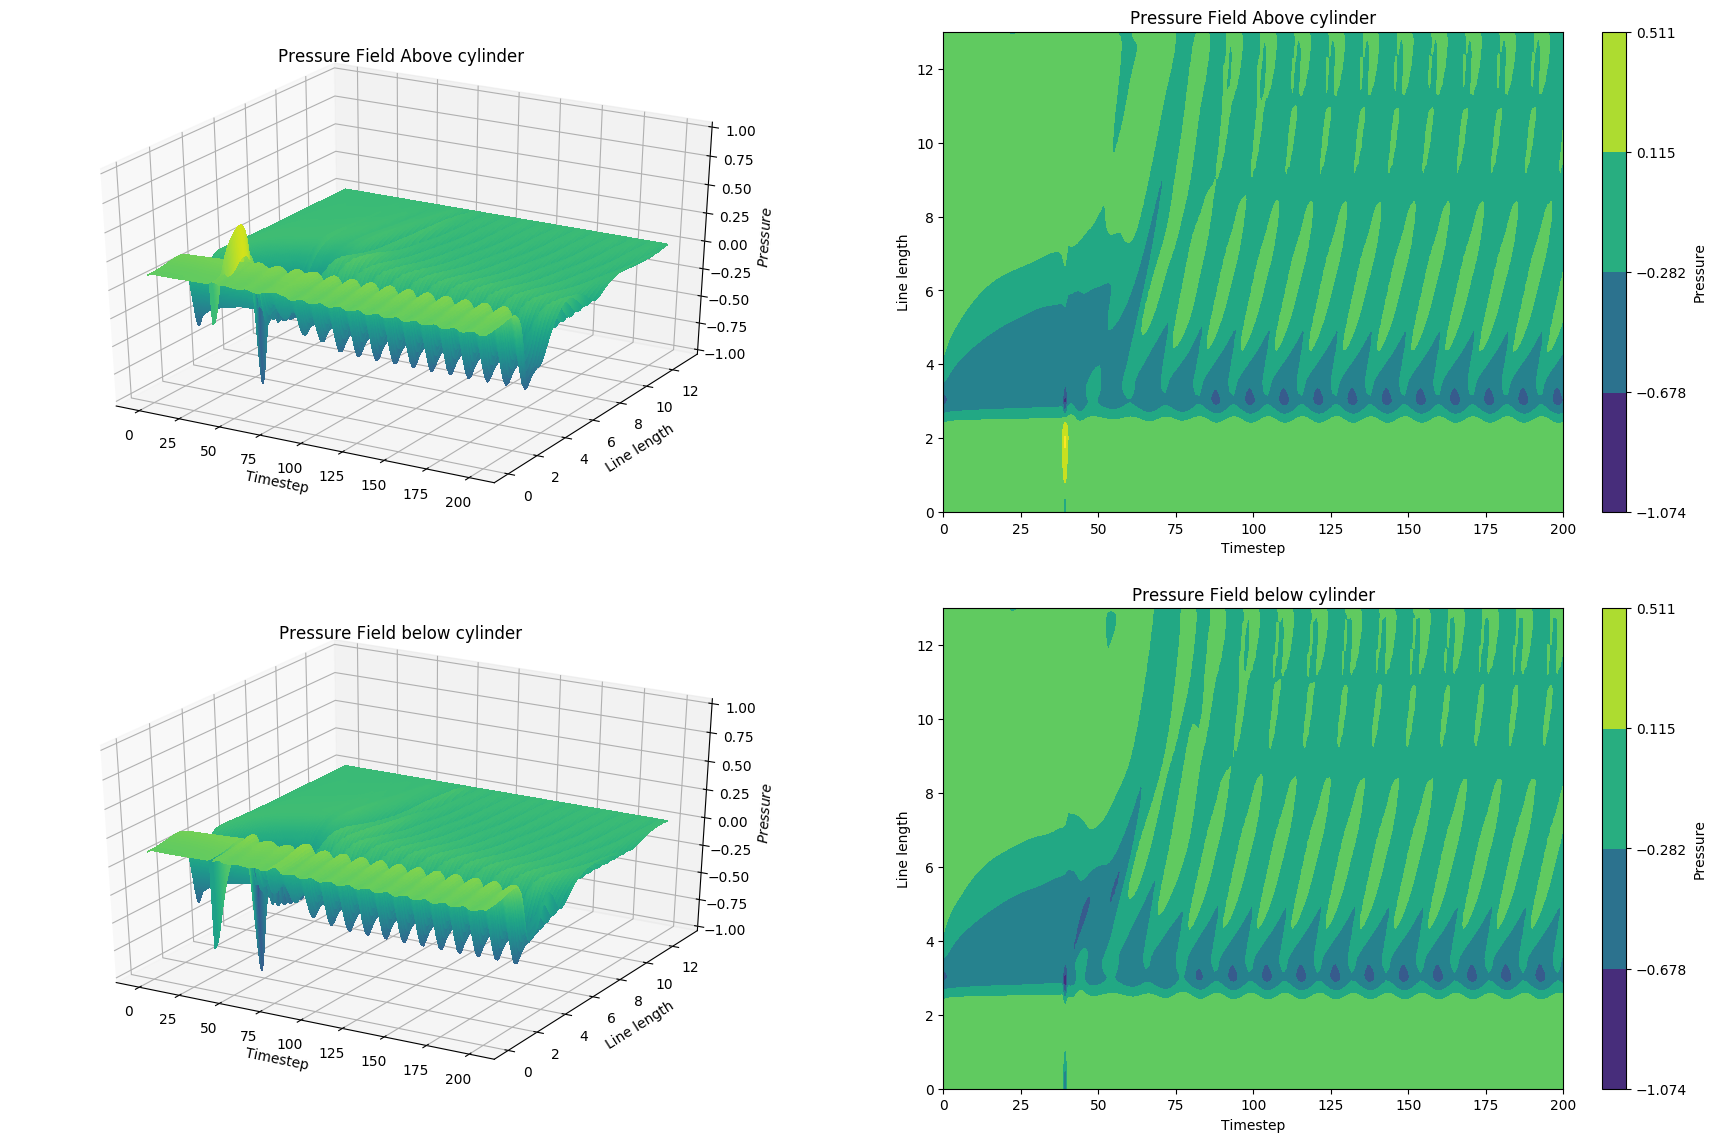

In [6]:
fig = plt.figure(figsize=(22,14), dpi=100)
# 3D view the pressure above
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(TSa, LLa, pressureFieldA, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False, vmin=minVal, vmax=maxVal)
ax.set_xlabel('Timestep')
ax.set_ylabel('Line length')
ax.set_zlabel('$Pressure$')
ax.set_zlim([-1,1])
ax.set_title('Pressure Field Above cylinder')

# contour of the pressure above
ax = fig.add_subplot(2, 2, 2)
ax.contourf(TSa, LLa, pressureFieldA, 5, cmap = cm.viridis, vmin=minVal, vmax=maxVal)
cbar = plt.cm.ScalarMappable(cmap=cm.viridis)
cbar.set_array(pressureFieldA)
cbar.set_clim(minVal, maxVal)
cbar = plt.colorbar(cbar, boundaries=np.linspace(minVal,maxVal,5))
cbar.ax.set_ylabel('Pressure')
ax.set_xlabel('Timestep')
ax.set_ylabel('Line length')
ax.set_title('Pressure Field Above cylinder')

# 3D view the pressure below
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(TSb, LLb, pressureFieldB, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False, vmin=minVal, vmax=maxVal)
ax.set_xlabel('Timestep')
ax.set_ylabel('Line length')
ax.set_zlabel('$Pressure$')
ax.set_zlim([-1,1])
ax.set_title('Pressure Field below cylinder')

# contour of the pressure below
ax = fig.add_subplot(2, 2, 4)
ax.contourf(TSb, LLb, pressureFieldB, 5, cmap = cm.viridis, vmin=minVal, vmax=maxVal)
cbar = plt.cm.ScalarMappable(cmap=cm.viridis)
cbar.set_array(pressureFieldB)
cbar.set_clim(minVal, maxVal)
cbar = plt.colorbar(cbar, boundaries=np.linspace(minVal,maxVal,5))
cbar.ax.set_ylabel('Pressure')
ax.set_xlabel('Timestep')
ax.set_ylabel('Line length')
ax.set_title('Pressure Field below cylinder')

It can be seen that the perturbation is really not required because it has been done 'too' late. The shape that the low pressure is creating is almost achieved without the perturbation in the inlet (this is shown in the final simulation where no perturbation is used).

## 2.4. 2D representation

In order to extract a little more information, it will be useful to see slices along the line length of the domain in 2D. Slices at $x=2$, $x=4$, $x=6$, $x=8$, $x=10$ and $x=12$ will be computed to draw somme conclusions.

Text(0.5,0,'Time ($s$)')

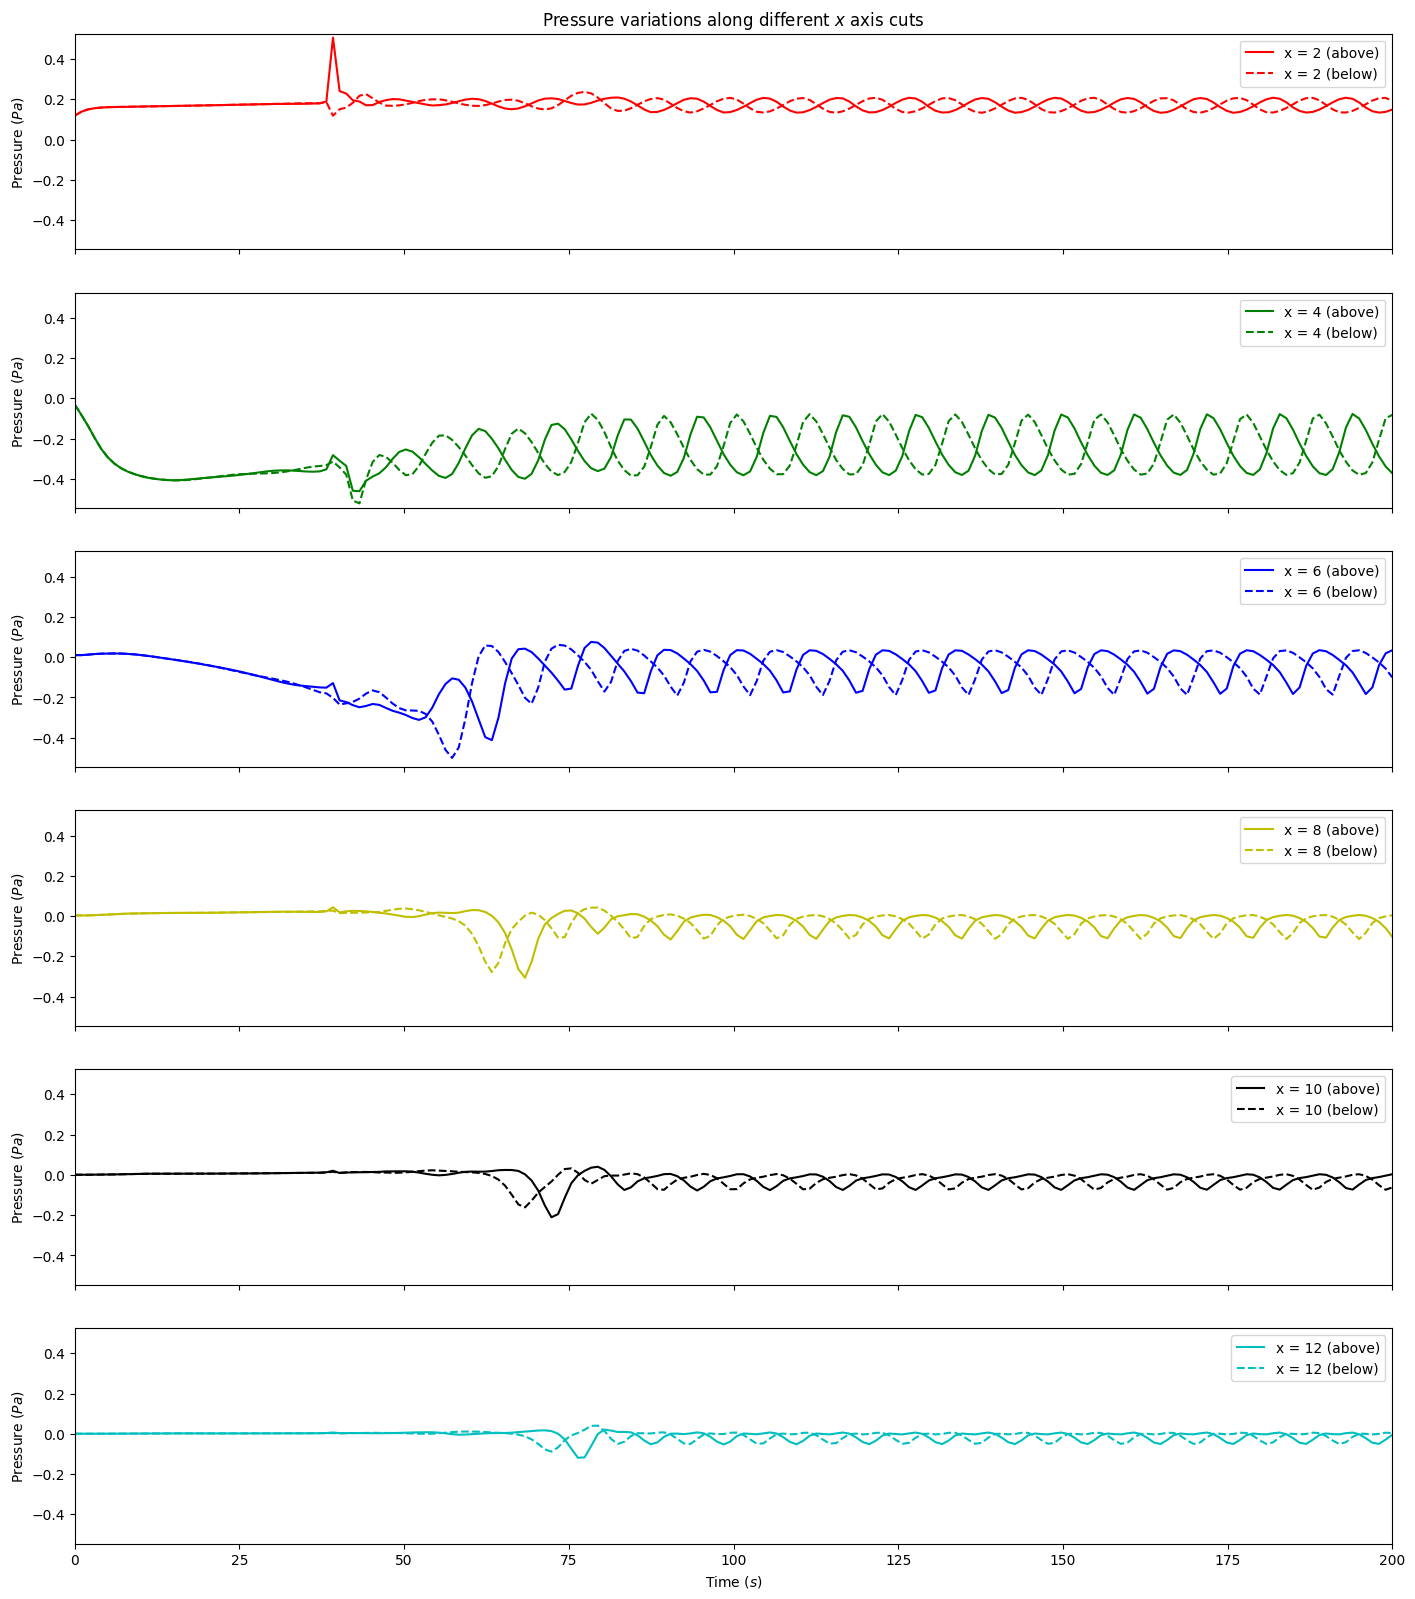

In [7]:
# plot the different cuts along the x-axis having pressure variations along time
cutPlane = [2,4,6,8,10,12]
cLine = ['r','g','b','y','k','c']

# define the figure
f, ax = plt.subplots(6, sharex=True, figsize=(17,20), dpi=100)

# loop over the different cuts
for i in range(6):
    ax[i].plot(np.linspace(0, timesteps, timesteps), above[:,np.abs(above[0,:,5]-cutPlane[i]).argmin(),0], '-', color=cLine[i], label='x = %i (above)' %cutPlane[i])
    ax[i].plot(np.linspace(0, timesteps, timesteps), below[:,np.abs(below[0,:,5]-cutPlane[i]).argmin(),0], '--', color=cLine[i], label='x = %i (below)' %cutPlane[i])
    ax[i].set_ylabel(r'Pressure ($Pa$)')
    ax[i].set_xlim([0,200])
    ax[i].legend(loc='best')
    
# compute the maximum and minimum values of the autodefined limits
minYlim = np.array([ax[j].get_ylim()[0] for j in range(6)]).min()
maxYlim = np.array([ax[j].get_ylim()[1] for j in range(6)]).max()

# use the same figure limits for all subplots
for i in range(6):
    ax[i].set_ylim(minYlim,maxYlim)

# set a 'global' title in the first figure
ax[0].set_title(r'Pressure variations along different $x$ axis cuts')
# set the x label only in the last figure
ax[-1].set_xlabel(r'Time ($s$)')

## 2.5. Wave interpolation and calculations

It can be seen that all different slice along the X-axis have the oscillations coupled in the above and below streamline (but out of phase). After $t=100\ s$ the oscillations are constant and repetitive, so in order to analyze them, a curve fitting will be done. The parameters of amplitude, frequency, phase and offset will be computed for the different curves. The original idea from the fitting was taken from: http://scipy-cookbook.readthedocs.io/items/FittingData.html

In [8]:
# restrict the data of the slices from t = 100s onwards
above100 = above[100:,:,0]
below100 = below[100:,:,0]

# creation of time values
time = np.linspace(100, 200, 100)

In [9]:
def sine_fit(p, x):
    # classical sine wave function
    # x is a point (or array) to compute the sine function at the location
    # p is a vector that contains [amplitude, frequency, phase, offset]
    return p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]

def dist_func(p, x, y): 
    # distance to the sine function defined above
    # y may also be a list of points of the same length of x
    return sine_fit(p, x) - y 

In [10]:
# allocation of space for (amplitude, frequency, phase and offset) for the whole slices of above100 and below100
p1a = np.zeros((4,np.shape(above100)[1]))
p1b = np.zeros((4,np.shape(below100)[1]))

# go over above100 to compute the wave-parameters of each x-axis slice
for i in range(np.shape(above100)[1]):
    press = above100[:,i]
    # the intial guess for each case is composed of:
    #    amplitude: sqrt(2)*standardDeviation(data) is one way of having a guess on amplitude (http://www.dspguide.com/ch2/2.htm)
    #    frequency: start with a value high enough that will be afterwards corrected
    #    phase: assume zero for the guess
    #    offset: mean(data) gives the mean value of the wave function
    guess = [np.sqrt(2)*np.std(press), 11, 0., np.mean(press)]
    # calculation of the optimum parameters for the data set
    p1a[:,i], success = scipy.optimize.leastsq(dist_func, guess[:], args=(time, press))

# go over below100 to compute the wave-parameters of each x-axis slice (following the same procedure as before)
for i in range(np.shape(below100)[1]):
    press = below100[:,i]
    guess = [np.sqrt(2)*np.std(press), 11, 0., np.mean(press)]
    p1b[:,i], success = scipy.optimize.leastsq(dist_func, guess[:], args=(time, press))

Text(0.5,0,'Line length')

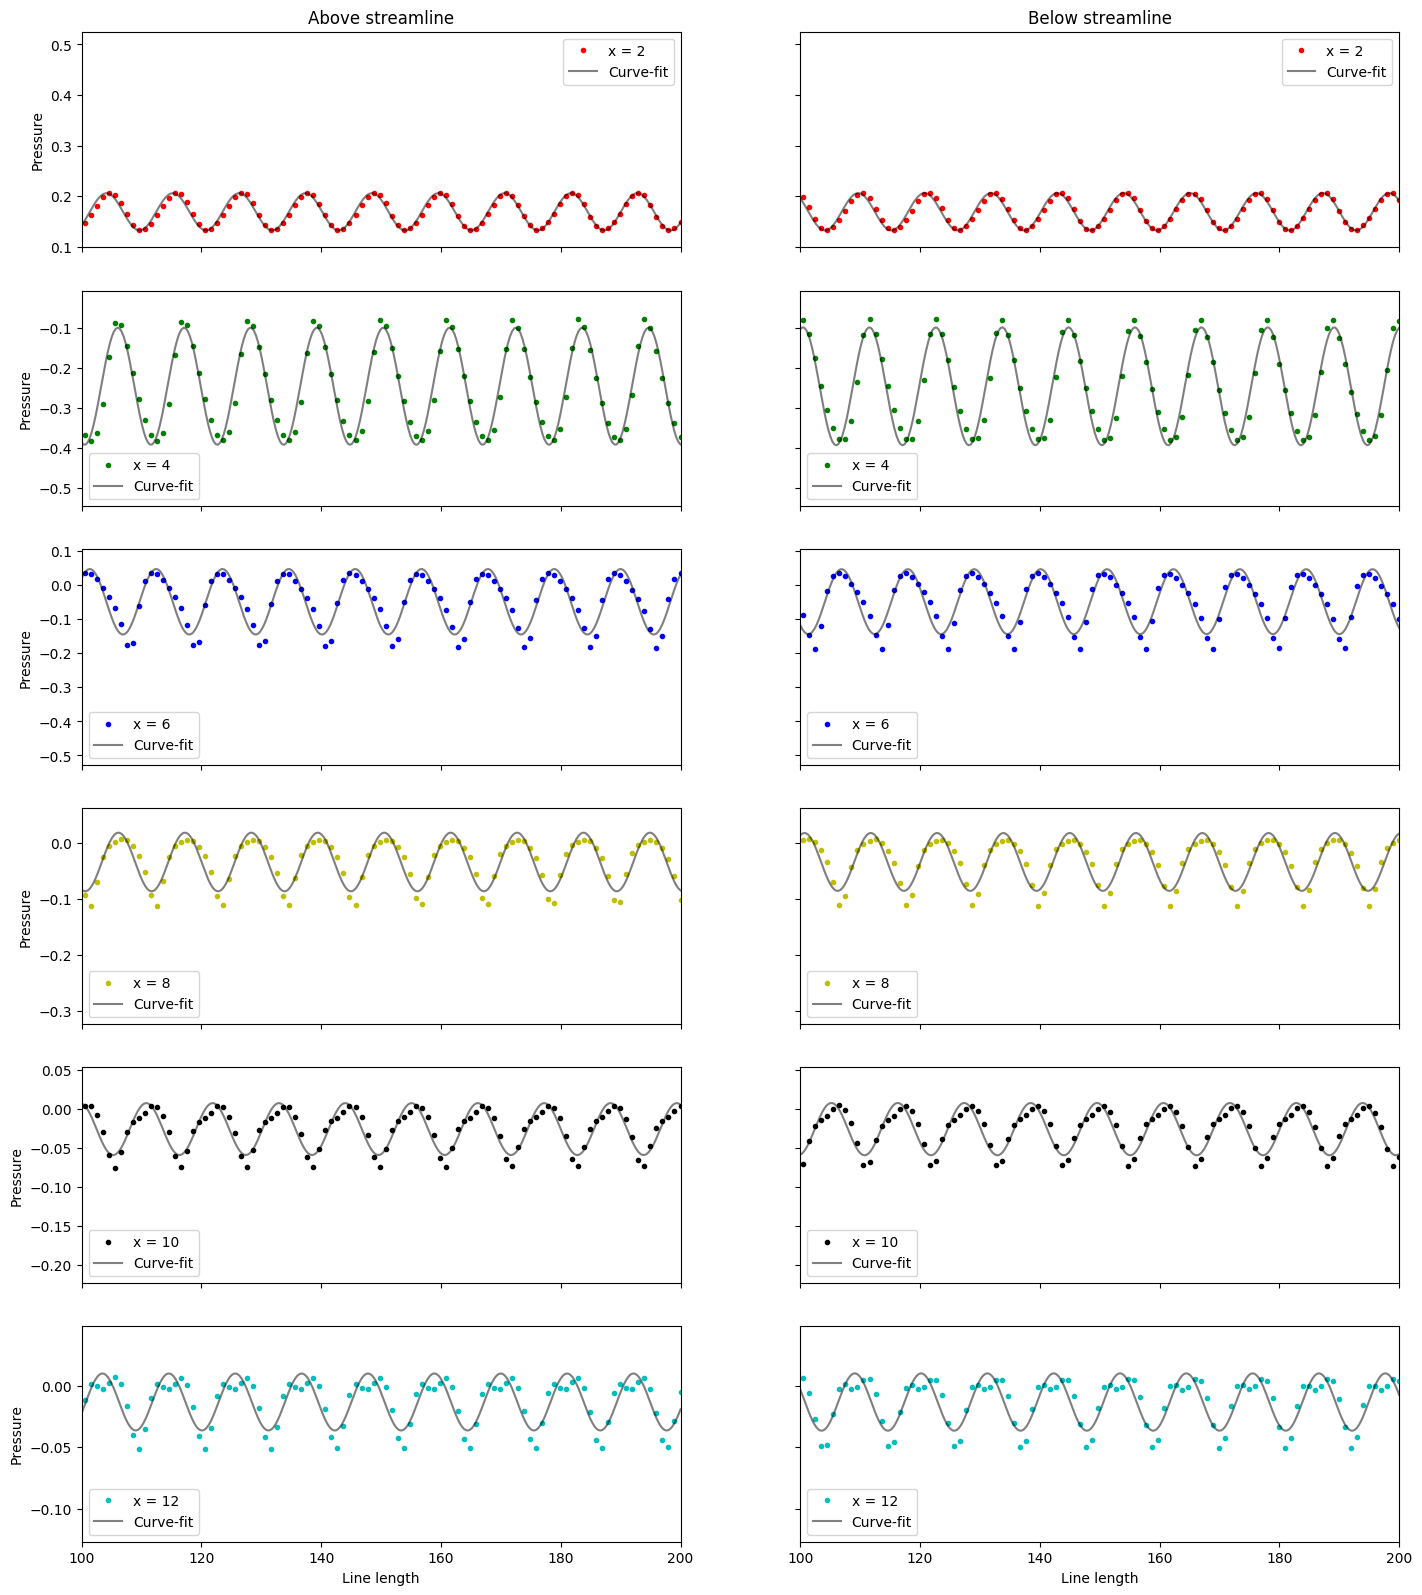

In [11]:
# the fitting obtained is shown for the same x-axis cuts done before
fig, ax = plt.subplots(nrows=6, ncols=2, sharex=True, sharey='row', figsize=(17,20), dpi=100)

# creation of time values
time = np.linspace(100, 200, 300)

# add the fit to the data obtained before
for i in range(6):   
    ax[i][0].plot(np.linspace(0, timesteps, timesteps), above[:,np.abs(above[0,:,5]-cutPlane[i]).argmin(),0], '.', color=cLine[i], label='x = %i' %cutPlane[i])
    ax[i][0].plot(time, sine_fit(p1a[:,np.abs(above[0,:,5]-cutPlane[i]).argmin()], time), 'k-', alpha=0.5, label='Curve-fit')
    ax[i][0].set_xlim([100,200])
    ax[i][0].set_ylabel('Pressure')
    ax[i][0].legend()

    ax[i][1].plot(np.linspace(0, timesteps, timesteps), below[:,np.abs(below[0,:,5]-cutPlane[i]).argmin(),0], '.', color=cLine[i], label='x = %i' %cutPlane[i])
    ax[i][1].plot(time,sine_fit(p1b[:,np.abs(below[0,:,5]-cutPlane[i]).argmin()], time), 'k-', alpha=0.5, label='Curve-fit')
    ax[i][1].set_xlim([100,200])
    ax[i][1].legend()

# add title and label
ax[0][0].set_title('Above streamline')
ax[0][1].set_title('Below streamline')
ax[-1][0].set_xlabel('Line length')
ax[-1][1].set_xlabel('Line length')

Text(0.5,1,'Offset')

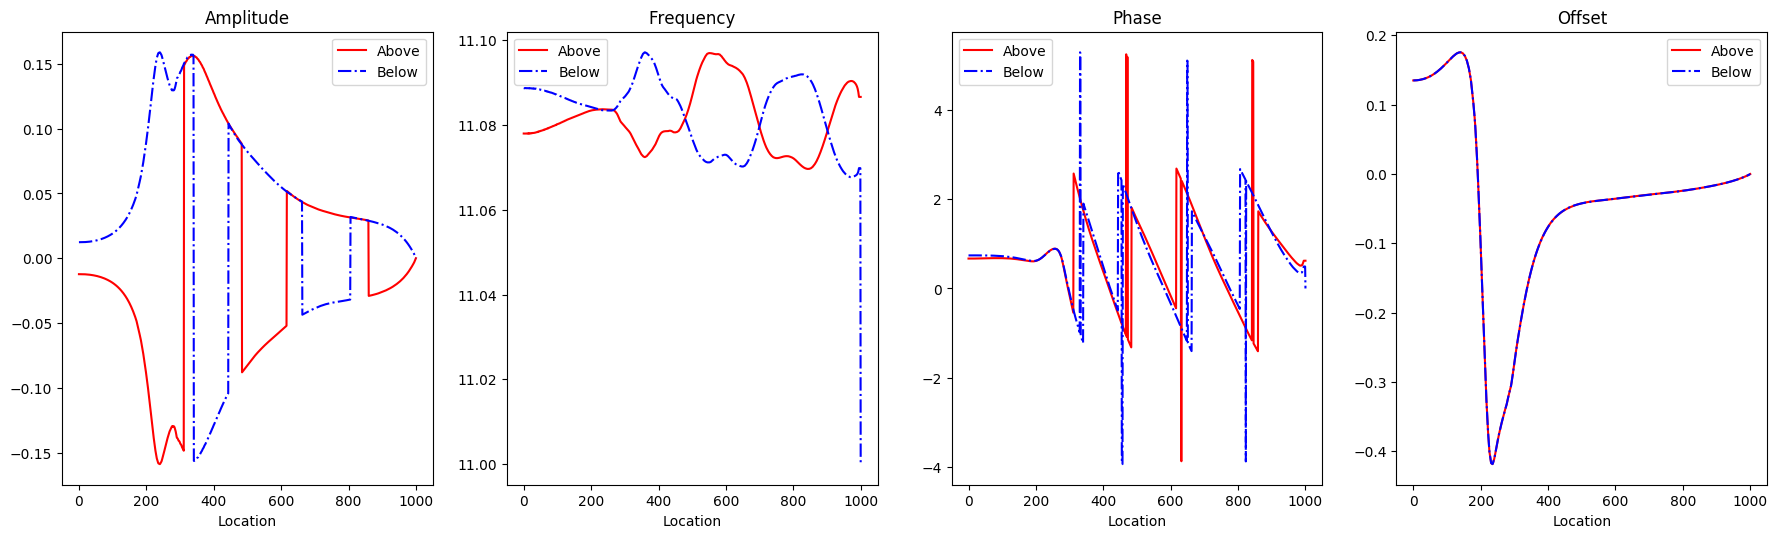

In [12]:
# comparison of the data for all the x-axis points
fig, ax = plt.subplots(1, 4, figsize=(22,6), dpi=100)
for i in range(4):
    ax[i].plot(p1a[i,:], '-r', label='Above')
    ax[i].plot(p1b[i,:], '-.b', label='Below')

# Axis labels and legend
[ax[i].set_xlabel('Location') for i in range(4)]
[ax[i].legend() for i in range(4)]

# Subplots titles
ax[0].set_title('Amplitude')
ax[1].set_title('Frequency')
ax[2].set_title('Phase')
ax[3].set_title('Offset')

It can be seen that offset is the same in both the above and below streamline. Amplitude varies in an out-of-phase fashion. Frequency is also out of phase. Offsets have great variations but they are coupled for both streamlines.

In [13]:
#Class to create an HTML table with some data - taken from Yves Dubief
class ListTable(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                html.append("<td>{0}</td>".format(col))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [14]:
# creation of a table to show up the mean and standard deviation of the results
table = ListTable()
table.append(['<b>Value</b>', '<b>Slice</b>', r'<b>Mean</b> ($\mu$)', r'<b>Std dev</b> ($\sigma$)'])
table.append(['Amplitude', 'Above', np.round(np.mean(p1a[0,:]),8), np.round(np.std(p1a[0,:]),8)])
table.append(['Amplitude', 'Below', np.round(np.mean(p1b[0,:]),8), np.round(np.std(p1b[0,:]),8)])
table.append(['Frequency', 'Above', np.round(np.mean(p1a[1,:]),8), np.round(np.std(p1a[1,:]),8)])
table.append(['Frequency', 'Below', np.round(np.mean(p1b[1,:]),8), np.round(np.std(p1b[1,:]),8)])
table.append(['Phase', 'Above', np.round(np.mean(p1a[2,:]),8), np.round(np.std(p1b[2,:]),8)])
table.append(['Phase', 'Below', np.round(np.mean(p1b[2,:]),8), np.round(np.std(p1b[2,:]),8)])
table.append(['Offset', 'Above', np.round(np.mean(p1a[3,:]),8), np.round(np.std(p1b[3,:]),8)])
table.append(['Offset', 'Below', np.round(np.mean(p1b[3,:]),8), np.round(np.std(p1b[3,:]),8)])
table

Value,Slice,Mean ($\mu$),Std dev ($\sigma$)
Amplitude,Above,-0.0018655,0.07922709
Amplitude,Below,0.0260005,0.07501319
Frequency,Above,11.08154982,0.00740874
Frequency,Below,11.08280937,0.00841434
Phase,Above,0.67076844,0.90277838
Phase,Below,0.70520027,0.90277838
Offset,Above,-0.0392155,0.13290525
Offset,Below,-0.03922256,0.13290525


It can be seen that the amplitude is quite small but it varies considerably along the slice. This is also true to the phase and offster. However, for the frequency the mean is the same in the above and below slices, having a small standard deviation. Thus, the frequency of the vortex shedding in the CFD simulation is constant (and will depend on the Reynold number). To compute the Strouhal number (https://en.wikipedia.org/wiki/Strouhal_number), the frequency of the vortex shedding should be computed along time instead of with line lengths. The approach for the final case is to be the use of the lift and drag forces (https://ocw.mit.edu/courses/mechanical-engineering/2-22-design-principles-for-ocean-vehicles-13-42-spring-2005/readings/lec20_viv1.pdf) to compute the frequency and to reduce it as much as possible.

# 3. Calculation for flow control: rotational BC

One of the most classic methods to control the flow is with the rotation of the cylinder. Although this won't be very practical for an airfoil, in the case of a cylinder can  be more easily achieved. To achieve a good understanding, a time dependant function will be created: a step fuction is needed to turn ON/OFF the flow control system combined with a sine or cosine function to change the direction of rotation or a step function to have a constant rotation. These functions can be written by using the Heaviside function as follow:

$$
g(t) = u_c(t)\ f(t-c)
$$

where $u_c(t)$ is the Heaviside function and $f(t-c)$ is the function that the system will take when it is ON. Applying th Laplace transform to the equation, it yields:

$$
\mathcal{L} (u_c(t)\ f(t-c)) = \int_{0}^{\infty} e^{-st}\ u_c(t)\ f(t-c)\ dt = \int_{c}^{\infty} e^{-st}\  f(t-c)\ dt  
$$

Applying a change in variable inside the integral (replacing $u = t-c$):
$$
\mathcal{L} (u_c(t)\ f(t-c)) = \int_{0}^{\infty} e^{-s(u+c)}\ f(u)\ du = \int_{0}^{\infty} e^{-su}\ e^{-sc}\ f(u)\ du   
$$

Integrating:
$$
\mathcal{L} (u_c(t)\ f(t-c)) = e^{-sc}\ \int_{0}^{\infty} e^{-su}\ f(u)\ du = e^{-cs} F(s) 
$$

Taking the inverse Laplace transform, the function in time domain is obtained:
$$
\mathcal{L}^{1}(e^{-cs} F(s)) = u_c(t)\ f(t-c)
$$

In this case, the function $F(s) = \mathcal{L}(sin(\omega t))=\dfrac{\omega}{s^2+\omega^2}$

In [15]:
s, t = sp.symbols('s, t')
w = sp.symbols('w', real = True)

In [16]:
switchTime = 75
rotatingBC_exp = sp.exp(-switchTime*s)*w/(s**2+w**2)

rotatingBC = sp.inverse_laplace_transform(rotatingBC_exp, s, t)

Although simulation has a time limit of 200 s, the time will only go until 150 s to see if the vortex shedding may be eliminated if the flow control system is turned off or if it is still necessary. This will be possible to the <tt> .csv </tt> boundary condition introduction by simply limiting the time to 150 s - when OpenFOAM (back then SimScale) reads the file, it will clamp the values when time goes above 150 s, the value of the rotating velocity will be the last value of the file - which is indeed zero.


Text(0,0.5,'Rotating wall velocity')

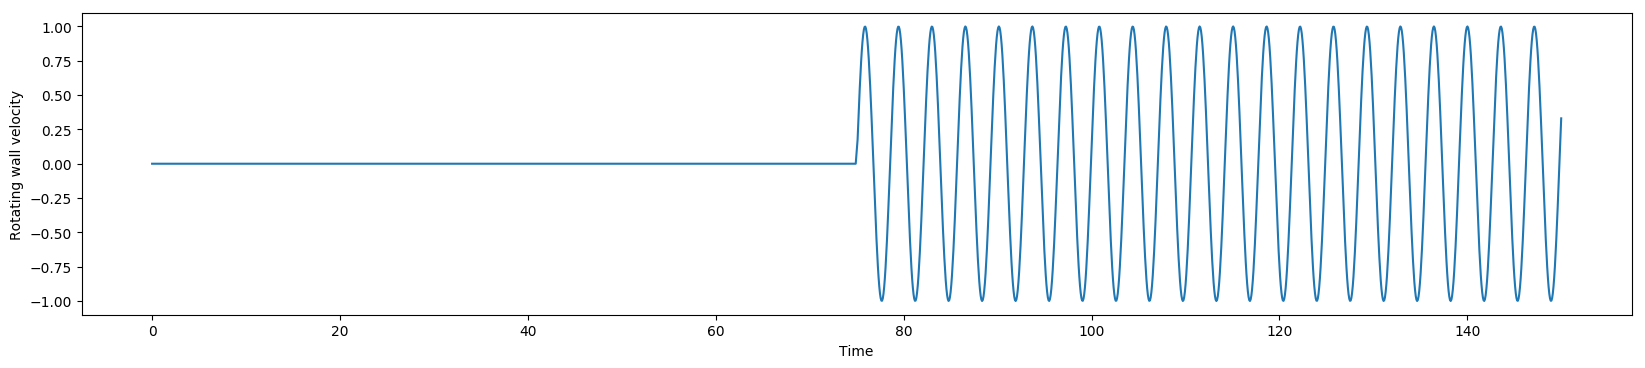

In [17]:
# create a linspace, avoiding unnecesary data when the flow control is off
rotBCtime = np.concatenate([np.linspace(0,74.9,3),np.linspace(75.1,150,1007)])

# create an empty array for the rotational velocity
rotatingBCvals = np.zeros(len(rotBCtime))

# evaluate the function previously computed on that points
for i in range(len(rotBCtime)):
    rotatingBCvals[i] = rotatingBC.evalf(subs={t:rotBCtime[i], w:np.mean([np.mean(p1a[1,:]),np.mean(p1b[1,:])])/(2*np.pi)})

# plot the function
fig, ax = plt.subplots(1, figsize=(20,4), dpi = 100)
ax.plot(rotBCtime, rotatingBCvals)
ax.set_xlabel('Time')
ax.set_ylabel('Rotating wall velocity')

Let's save the computed points in a <tt> .csv </tt> file to use it as the simulation boundary condition.

In [18]:
# add the last value to be zero
dummyMatrix = np.vstack((np.append(rotBCtime,150.01), np.append(rotatingBCvals,0))).T
# save the data in a file
np.savetxt("rotatingBC.csv", dummyMatrix, delimiter=",")

# 4. Calculation for flow control: momentum insertion BC

At first, only flow momentum introduction will be considered. If the sine has negative values, it will have suction. In order to achieve just introduction, a displacement of the sine function must be performed, applying an offset in the vertical direction. Also,  if instead one impulse of the Heaviside function, two are applied - one in each direction - a rectangular function can be obtained. Given that <tt> Heaviside </tt> is not implemented in OpenFOAM, it will be represented with $tanh(x)$. Multiplying the obtainted function times the offsetSine will yield the final momentum insertion BC.

In [19]:
# select the time of turning on and off the functions
onTime = 75
offTime = 150

# create the function and compute the Laplace transform
rectangular_exp = -(sp.exp(-offTime*s)-sp.exp(-onTime*s))/s
rectangular = sp.inverse_laplace_transform(rectangular_exp, s, t)

rectangularHeav = list(str(rectangular))
rectangularTanh = []

# transform the rectangular string into hyperbolic tangent
i = 0
while i < len(str(rectangular)):
    if rectangularHeav[i] == 'H':
        rectangularTanh.append('t')
        rectangularTanh.append('a')
        rectangularTanh.append('n')
        rectangularTanh.append('h')
        i += len('Heaviside')
    else:
        rectangularTanh.append(str(rectangular)[i])
        i += 1
        
rectangularTanh = sp.parsing.sympy_parser.parse_expr(''.join(rectangularTanh))

In [20]:
# create an offset sine that only has blowing
offsetSine = sp.sin(t) + 1

# add the functions
momBC = rectangularTanh*offsetSine

# print the function
print(momBC)

(sin(t) + 1)*(-tanh(t - 150) + tanh(t - 75))


Text(0,0.5,'Flow velocity')

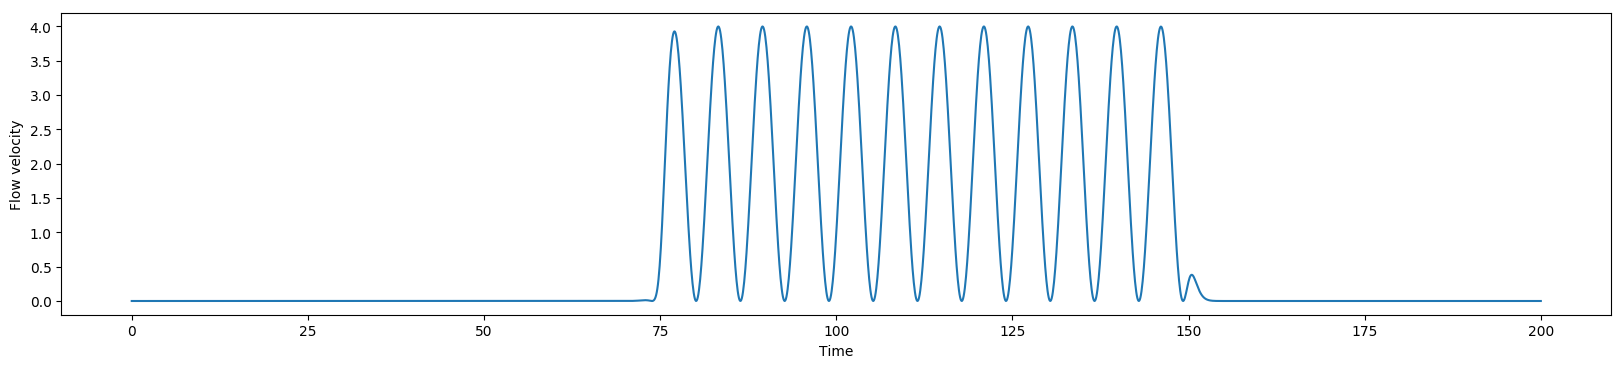

In [21]:
# create a linspace, avoiding unnecesary data when the flow control is off
momBCtime = np.concatenate([np.linspace(0,69.9,3),np.linspace(71.1,154.9,1007),np.linspace(155.1,200,3)])

# create an empty array for the rotational velocity
momentumBCvals = np.zeros(len(momBCtime))

# evaluate the function previously computed on that points
for i in range(len(momBCtime)):
    momentumBCvals[i] = momBC.evalf(subs={t:momBCtime[i]})
    
# plot the function
fig, ax = plt.subplots(1, figsize=(20,4), dpi = 100)
ax.plot(momBCtime, momentumBCvals)
ax.set_xlabel('Time')
ax.set_ylabel('Flow velocity')

# 5. Calculation for flow control: blowing and suction (zero $ \overline{m v}$ introduction) BC

Considering the same function as before but not offsetting the sine to have both blowing and suction in the boundary condition, the resulting function will be:

In [22]:
# select the time of turning on and off the functions
onTime = 75
offTime = 150

# create the function and compute the Laplace transform
rectangular_exp = -(sp.exp(-offTime*s)-sp.exp(-onTime*s))/s
rectangular = sp.inverse_laplace_transform(rectangular_exp, s, t)

rectangularHeav = list(str(rectangular))
rectangularTanh = []

# transform the rectangular string into hyperbolic tangent
i = 0
while i < len(str(rectangular)):
    if rectangularHeav[i] == 'H':
        rectangularTanh.append('t')
        rectangularTanh.append('a')
        rectangularTanh.append('n')
        rectangularTanh.append('h')
        i += len('Heaviside')
    else:
        rectangularTanh.append(str(rectangular)[i])
        i += 1

rectangularTanh = sp.parsing.sympy_parser.parse_expr(''.join(rectangularTanh))

In [23]:
# create an offset sine that both blowing and suction
notOffsetSine = sp.sin(t)

# add the functions
BSmomBC = rectangularTanh*notOffsetSine

# print the functions
print(BSmomBC)

(-tanh(t - 150) + tanh(t - 75))*sin(t)


Text(0,0.5,'Flow velocity')

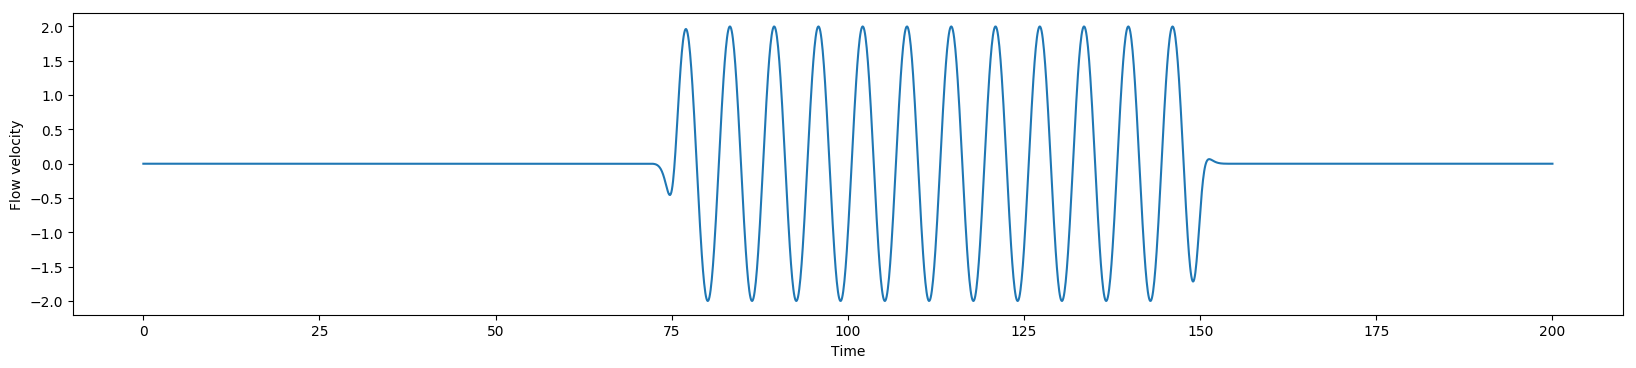

In [24]:
# create a linspace, avoiding unnecesary data when the flow control is off
BSmomBCtime = np.concatenate([np.linspace(0,69.9,3),np.linspace(71.1,154.9,1007),np.linspace(155.1,200,3)])

# create an empty array for the rotational velocity
BSmomBCvals = np.zeros(len(BSmomBCtime))

# evaluate the function previously computed on that points
for i in range(len(BSmomBCtime)):
    BSmomBCvals[i] = BSmomBC.evalf(subs={t:BSmomBCtime[i]})
    
# plot the function
fig, ax = plt.subplots(1, figsize=(20,4), dpi = 100)
ax.plot(BSmomBCtime, BSmomBCvals)
ax.set_xlabel('Time')
ax.set_ylabel('Flow velocity')